# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

# Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

## Load Data

In [2]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
data = pd.read_csv("/content/drive/MyDrive/ToBigs/Regression/assignment3_creditcard.csv")

In [5]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


## Data preprocessing


### Scaling data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler() # Scaling
scaler.fit_transform(data)

array([[-0.90218019,  1.44246214,  0.24207645, ..., -0.04709654,
         0.9417547 , -0.09301733],
       [ 1.02744235, -0.32892601, -0.7953942 , ..., -0.23721911,
        -0.22629752, -0.09301733],
       [-1.46190736, -1.73320058,  0.7053479 , ..., -0.7554671 ,
        -1.02943014, -0.09301733],
       ...,
       [ 1.02786291,  0.0843943 , -0.9747001 , ..., -0.15087861,
        -0.1030219 , -0.09301733],
       [-0.33236542,  0.79733419,  0.8782926 , ..., -2.140772  ,
        -1.05999649, -0.09301733],
       [ 1.09831537, -0.52987507, -0.90637085, ..., -0.13776702,
        -0.2565925 , -0.09301733]])

In [27]:
s_features = pd.DataFrame(scaler.fit_transform(features), columns= features.columns)

In [28]:
s_features.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,...,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04
mean,-1.635254e-17,-1.263606e-17,2.527211e-17,-1.263606e-17,1.015840e-17,2.477658e-19,4.707550e-18,4.955316e-19,-6.503852e-18,-9.910632e-19,...,-5.946379e-18,4.955316e-18,1.982126e-18,-1.288382e-17,-3.716487e-18,3.468721e-18,1.982126e-18,8.424037e-18,1.486595e-18,-2.973189e-18
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.503177e+01,-2.612761e+01,-1.766508e+01,-3.776757e+00,-2.832210e+01,-1.637204e+01,-2.849580e+01,-2.878613e+01,-1.182981e+01,-1.944962e+01,...,-5.591230e+00,-2.969587e+01,-2.533713e+01,-1.201742e+01,-6.175535e+01,-4.503490e+00,-1.295591e+01,-4.631360e+00,-1.868655e+01,-3.241807e+01
25%,-4.437564e-01,-3.892156e-01,-4.856507e-01,-5.942105e-01,-4.580970e-01,-5.678302e-01,-3.554381e-01,-1.555117e-01,-5.673308e-01,-4.010154e-01,...,-5.635158e-01,-2.947559e-01,-2.783608e-01,-7.283577e-01,-2.624144e-01,-5.886414e-01,-6.113030e-01,-6.749650e-01,-1.800852e-01,-1.810515e-01
50%,1.746923e-02,1.342993e-02,1.289095e-01,-3.116696e-02,-1.769798e-02,-2.001620e-01,5.991243e-02,1.201993e-02,-3.224254e-02,-4.490062e-02,...,-6.129726e-03,-9.083206e-02,-4.611644e-02,1.076176e-02,-1.077972e-02,6.779550e-02,4.200870e-02,-1.146949e-01,2.773428e-03,3.215157e-02
75%,6.561176e-01,4.661079e-01,6.119879e-01,4.956607e-01,4.351471e-01,2.991023e-01,4.196195e-01,2.371456e-01,5.504490e-01,4.006397e-01,...,5.566773e-01,1.784910e-01,2.054238e-01,7.127044e-01,2.554264e-01,7.260327e-01,6.848133e-01,4.990833e-01,2.283979e-01,2.607619e-01
max,1.188742e+00,1.324966e+01,2.341054e+00,8.022605e+00,2.215588e+01,1.682497e+01,2.524627e+01,1.466017e+01,7.170510e+00,1.219665e+01,...,6.310274e+00,3.642229e+01,3.209935e+01,1.130917e+01,1.624181e+01,6.545184e+00,4.850554e+00,6.455620e+00,2.804256e+01,5.030682e+01


### Set target data

In [13]:
data["Class"] = pd.Series(data["Class"], dtype = "category")

In [15]:
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

In [16]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


In [18]:
target.value_counts()

0    28432
1      246
Name: Class, dtype: int64

# Modeling

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(s_features, target, test_size=0.2, random_state = 11, stratify = target)

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22942, 28) (5736, 28) (22942,) (5736,)


In [31]:
# Logistic Regression 

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
# class 예측
y_pred = model.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
model.predict_proba(X_test)

array([[9.99861069e-01, 1.38931098e-04],
       [9.92351335e-01, 7.64866506e-03],
       [9.99910912e-01, 8.90875031e-05],
       ...,
       [9.99578181e-01, 4.21818784e-04],
       [9.99895720e-01, 1.04279757e-04],
       [9.99667779e-01, 3.32221087e-04]])

In [35]:
# mean accuracy 
model.score(X_test, y_test)

0.9980822873082287

# Evaluation

## Confusion matrix

In [38]:
from sklearn.metrics import *

In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

p = fn + tp
n = tn + fp

### Accuracy

In [40]:
accuracy = (tp + tn) / (p + n)
print("Accuracy : ", accuracy) 

Accuracy :  0.9980822873082287


### Error Rate

In [41]:
errorRate = (fn + fp) / (p+n)
print("Error Rate : ", errorRate)

Error Rate :  0.0019177126917712692


### Recall

In [42]:
recall = (tp) / p
print("Recall : ", recall)

Recall :  0.8571428571428571


### Precision

In [43]:
precision = tp/ (tp + fp)
print("precision : ", precision)

precision :  0.9130434782608695


### Specificity

In [47]:
specificity =  tn / (tn + fp)
print("specificity : ", specificity)

specificity :  0.9992966414629858


### False Positive Rate

In [44]:
fpr = fp / n
print("FPR : ", fpr) 

FPR :  0.000703358537014243


### F1 score

In [45]:
f1 = f1_score(y_pred, y_test)
print("f1 : ", f1)

f1 :  0.8842105263157894


### ROC Curve

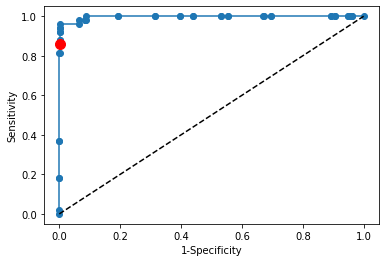

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

### AUC

In [49]:
from sklearn.metrics import auc
print("auc : ", auc(fpr, tpr))

auc :  0.9964329674194277
